In [5]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split
import pandas as pd
import numpy as np


file_path = 'E:/DM/ratings_small.csv/ratings_small.csv'  # Replace with the actual path to your file

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)

data = Dataset.load_from_file(file_path, reader)

In [6]:
train, test = train_test_split(data, test_size=0.25)

svd_model = SVD()
pmf_results = cross_validate(svd_model, data, measures=['RMSE','MAE'], cv=5, verbose=True)

svd_model.fit(train)

knn_user_model = KNNBasic(sim_options={'user_based': True})
user_results = cross_validate(knn_user_model, data, measures=['RMSE','MAE'], cv=5, verbose=True)

knn_user_model.fit(train)

knn_item_model = KNNBasic(sim_options={'user_based': False})
item_results = cross_validate(knn_item_model, data, measures=['RMSE','MAE'], cv=5, verbose=True)

knn_item_model.fit(train)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9038  0.8911  0.8952  0.9001  0.8928  0.8966  0.0047  
MAE (testset)     0.6971  0.6860  0.6897  0.6901  0.6874  0.6901  0.0038  
Fit time          1.88    1.60    1.12    1.07    1.00    1.33    0.34    
Test time         0.25    0.33    0.12    0.17    0.16    0.21    0.07    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9734  0.9759  0.9581  0.9650  0.9657  0.9676  0.0064

In [7]:
print("\nProbabilistic Matrix Factorization (PMF) Results:")
print("Average MAE:", sum(pmf_results['test_mae']) / 5)
print("Average RMSE:", sum(pmf_results['test_rmse']) / 5)


Probabilistic Matrix Factorization (PMF) Results:
Average MAE: 0.6900689512269794
Average RMSE: 0.8966033322962362


In [8]:
print("\nUser-based Collaborative Filtering Results:")
print("Average MAE:", sum(user_results['test_mae']) / 5)
print("Average RMSE:", sum(user_results['test_rmse']) / 5)



User-based Collaborative Filtering Results:
Average MAE: 0.7434710503245434
Average RMSE: 0.9676386825124131


In [9]:
print("\nItem-based Collaborative Filtering Results:")
print("Average MAE:", sum(item_results['test_mae']) / 5)
print("Average RMSE:", sum(item_results['test_rmse']) / 5)


Item-based Collaborative Filtering Results:
Average MAE: 0.7206963980017939
Average RMSE: 0.9347000173260056


In [10]:

algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)


algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9987  0.9933  0.9933  0.9897  0.9923  0.9935  0.0029  
MAE (testset)     0.7740  0.7647  0.7667  0.7672  0.7653  0.7676  0.0033  
Fit time          0.86    0.70    0.48    0.75    0.70    0.70    0.12    
Test time         2.14    1.71    1.74    2.65    2.30    2.11    0.35    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [11]:
UB_RMSE_GRAPH = []
UB_MAE_GRAPH = []
UB_RMSE_GRAPH.append(CV_UB_cosine['test_rmse'].mean())
UB_RMSE_GRAPH.append(CV_UB_msd['test_rmse'].mean())
UB_RMSE_GRAPH.append(CV_UB_pearson['test_rmse'].mean())
UB_MAE_GRAPH.append(CV_UB_cosine['test_mae'].mean())
UB_MAE_GRAPH.append(CV_UB_msd['test_mae'].mean())
UB_MAE_GRAPH.append(CV_UB_pearson['test_mae'].mean())

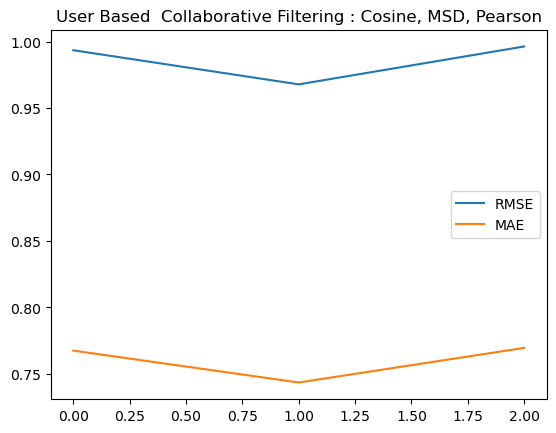

In [13]:
import matplotlib.pyplot as plt
s
plt.title("User Based  Collaborative Filtering : Cosine, MSD, Pearson")
plt.plot(UB_RMSE_GRAPH, label = 'RMSE')
plt.plot(UB_MAE_GRAPH, label = 'MAE')
plt.legend()

In [14]:
IB_RMSE_GRAPH = []
IB_MAE_GRAPH = []
IB_RMSE_GRAPH.append(CV_IB_cosine['test_rmse'].mean())
IB_RMSE_GRAPH.append(CV_IB_msd['test_rmse'].mean())
IB_RMSE_GRAPH.append(CV_IB_pearson['test_rmse'].mean())
IB_MAE_GRAPH.append(CV_IB_cosine['test_mae'].mean())
IB_MAE_GRAPH.append(CV_IB_msd['test_mae'].mean())
IB_MAE_GRAPH.append(CV_IB_pearson['test_mae'].mean())

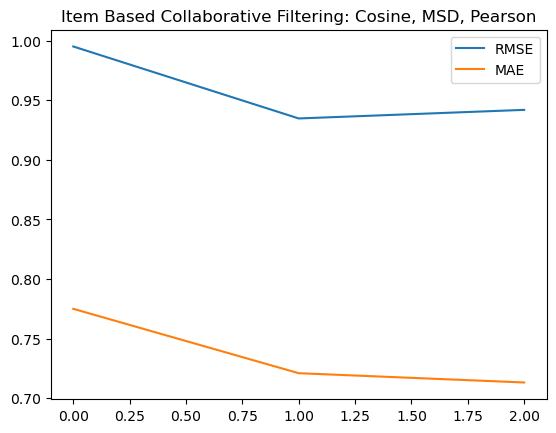

In [15]:
plt.title("Item Based Collaborative Filtering: Cosine, MSD, Pearson")
plt.plot(IB_RMSE_GRAPH, label = 'RMSE')
plt.plot(IB_MAE_GRAPH, label = 'MAE')
plt.legend()

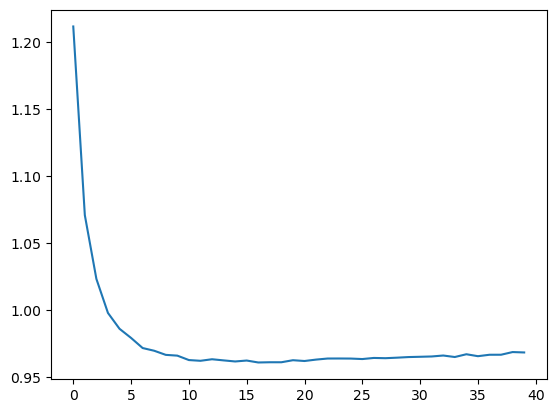

In [16]:
Range = range(1,41)
User = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        CV_User = cross_validate(algo, data, measures=['rmse', 'mae'],cv = 5,verbose = False)
        User.append(CV_User['test_rmse'].mean())

plt.plot(User)

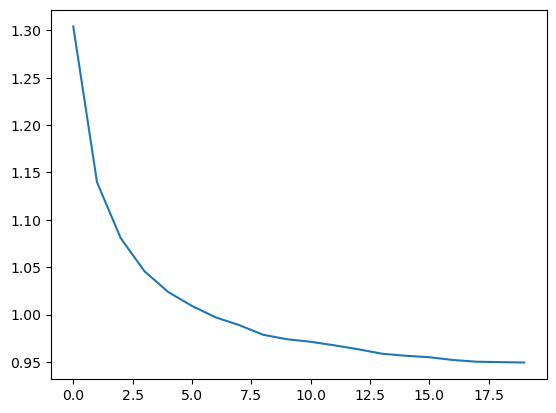

In [17]:
Range = range(1,21)
Item = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        CV_Item = cross_validate(algo, data, measures=['rmse', 'mae'],cv = 5,verbose = False)
        Item.append(CV_Item['test_rmse'].mean())

plt.plot(Item)

In [18]:
User.index(min(User))

16

In [19]:
Item.index(min(Item))

19